In [1]:
import sqlite3
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import VBox

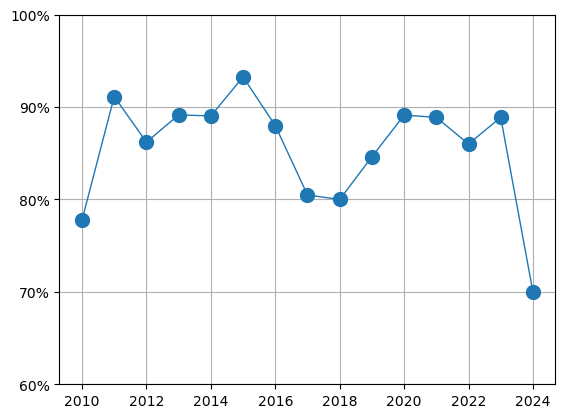

In [2]:
# Connect to the db
conn = sqlite3.connect("../data.db")
cur = conn.cursor()

years = list(range(2010, 2025))

wr = []
for y in years:
    cmd = "SELECT COUNT(*) FROM djokovic WHERE win='yes' and tourney_date LIKE '" + str(y) + "%';" # count wins
    cur.execute(cmd)
    w = cur.fetchone()[0]
    cmd = "SELECT COUNT(*) FROM djokovic WHERE win='no' and tourney_date LIKE '" + str(y) + "%';" # count losses
    cur.execute(cmd)
    l = cur.fetchone()[0]
    wr.append(w/(w+l) * 100)

plt.plot(years, wr, 'o-', markersize=10, linewidth=1.0)

plt.grid()
ax = plt.gca()
ax.set_yticks([60, 70, 80, 90, 100])
ax.set_yticklabels(str(s) + "%" for s in [60, 70, 80, 90, 100])
plt.savefig("./figures/djokovic_wr_year.png")
plt.show()

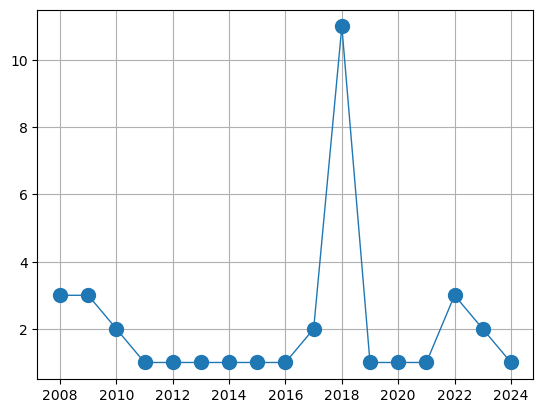

In [3]:
# Connect to the db
conn = sqlite3.connect("../data.db")
cur = conn.cursor()

years = list(range(2008, 2025))

rank = []
for y in years:
    cmd = "SELECT AVG(rank) FROM djokovic WHERE tourney_date LIKE '" + str(y) + "%';"
    cur.execute(cmd)
    rank.append(int(cur.fetchone()[0]))

conn.close()

plt.plot(years, rank, 'o-', markersize=10, linewidth=1.0)

plt.grid()
ax = plt.gca()
plt.savefig("./figures/djokovic_rank_year.png")
plt.show()

Strongest opponents

In [4]:
# Connect to the db
conn = sqlite3.connect("../data.db")
cur = conn.cursor()

years = list(range(2008, 2025))

cmd = 'SELECT \
    opponent, \
    (COUNT(CASE WHEN win = "yes" THEN 1.0 END)) as wins, \
    COUNT(*) AS total_matches,\
    (COUNT(CASE WHEN win = "yes" THEN 1.0 END) / CAST(COUNT(*) AS FLOAT)) * 100 AS winrate \
FROM djokovic \
GROUP BY opponent \
HAVING COUNT(*) > 5 \
ORDER BY winrate ASC;'

cur.execute(cmd)
res = cur.fetchall()
for player, wins, total, wr in res:
    print(f"{player}: {wins} out of {total} matches, {wr:.2f}% winrate")
conn.close()

Fernando Gonzalez: 2 out of 6 matches, 33.33% winrate
Ivo Karlovic: 2 out of 6 matches, 33.33% winrate
Jiri Vesely: 2 out of 6 matches, 33.33% winrate
Nick Kyrgios: 2 out of 6 matches, 33.33% winrate
Andy Roddick: 8 out of 18 matches, 44.44% winrate
Carlos Moya: 4 out of 8 matches, 50.00% winrate
Guillermo Coria: 4 out of 8 matches, 50.00% winrate
Olivier Rochus: 6 out of 12 matches, 50.00% winrate
Rafael Nadal: 60 out of 118 matches, 50.85% winrate
Roger Federer: 56 out of 102 matches, 54.90% winrate
Jannik Sinner: 8 out of 14 matches, 57.14% winrate
Dominic Thiem: 14 out of 24 matches, 58.33% winrate
Carlos Alcaraz: 6 out of 10 matches, 60.00% winrate
Holger Rune: 6 out of 10 matches, 60.00% winrate
Alex De Minaur: 4 out of 6 matches, 66.67% winrate
Alexander Zverev: 16 out of 24 matches, 66.67% winrate
Aslan Karatsev: 4 out of 6 matches, 66.67% winrate
Benoit Paire: 4 out of 6 matches, 66.67% winrate
Daniel Gimeno Traver: 4 out of 6 matches, 66.67% winrate
Daniil Medvedev: 20 out of

In [6]:
djokovic_opponents = pd.DataFrame([
    ["Andy Roddick",8,18,44.44444444],
    ["Rafael Nadal",60,118,50.84745763],
    ["Roger Federer",56,102,54.90196078],
    ["Jannik Sinner",8,14,57.14285714]],
    columns=['opponent', 'wins', 'total_matches', 'winrate'])

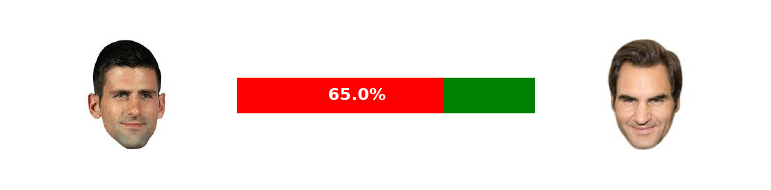

In [ ]:
import matplotlib.patches as patches

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.offsetbox as offsetbox

def barra_con_facce(p, img_sx_path, img_dx_path):
    # Clamp percentuale
    p = max(0, min(100, p))

    fig, ax = plt.subplots(figsize=(8, 2))
    ax.set_xlim(-10, 110)
    ax.set_ylim(0, 1)
    ax.axis('off')  # Nasconde assi

    # Barra rossa (da 0 a p)
    rosso = patches.Rectangle((0, 0.4), p, 0.2, color='red')
    ax.add_patch(rosso)

    # Barra verde (da p a 100)
    verde = patches.Rectangle((p, 0.4), 100 - p, 0.2, color='green')
    ax.add_patch(verde)

    # Testo al centro
    ax.text(50, 0.5, f'{p:.1f}%', color='white', ha='center', va='center', fontsize=12, weight='bold')

    # Aggiunge immagine a sinistra (Djokovic)
    img_sx = Image.open(img_sx_path)
    imagebox_sx = offsetbox.OffsetImage(img_sx, zoom=0.5)
    ab_sx = offsetbox.AnnotationBbox(imagebox_sx, (0, 0.5), frameon=False)
    ax.add_artist(ab_sx)

    # Aggiunge immagine a destra (Avversario)
    img_dx = Image.open(img_dx_path)
    imagebox_dx = offsetbox.OffsetImage(img_dx, zoom=0.5)
    ab_dx = offsetbox.AnnotationBbox(imagebox_dx, (100, 0.5), frameon=False)
    ax.add_artist(ab_dx)

    plt.tight_layout()
    plt.show()

# Esempio d'uso
barra_con_facce(65, '../img/djokovic.jpeg', '../img/federer.jpeg')
